In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error

# Step 2: Load the dataset
data = pd.read_csv("JM1.csv")
data = data.replace('?', np.nan)
data = data.dropna()
data


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False


In [23]:
model = LinearRegression()

X = data.drop('defects ', axis=1)
y = data['defects '].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 7: Perform feature selection using SelectKBest
k = 20  # Set the desired number of top features
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
selected_features_list = selected_features.tolist()  # Convert to list
print("Selected Features:", selected_features_list)

model.fit(X_train_selected, y_train)
y_pred_prob = model.predict(X_test_selected)


Selected Features: ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']


In [24]:
mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test_selected, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

selected_features = X.columns[selector.get_support()]
coefficients = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
print(coefficients)

Root Mean Squared Error: 0.37557717563368204
R-squared: 0.09274288872384495
              Feature   Coefficient
0                 loc  1.956016e-03
1                v(g) -8.584856e-03
2               ev(g) -2.625990e-03
3               iv(g)  1.662833e-03
4                   n  2.974675e-03
5                   v -4.743616e-04
6                   l -1.113193e-01
7                   d -2.647043e-03
8                   i  2.231600e-04
9                   b  1.028502e+00
10                  t -3.113764e-07
11             lOCode -2.109290e-03
12          lOComment -9.601017e-04
13            lOBlank  1.059352e-03
14  locCodeAndComment  8.803355e-03
15            uniq_Op  4.424411e-03
16          uniq_Opnd  2.010254e-03
17           total_Op -1.842969e-03
18         total_Opnd -2.233962e-03
19        branchCount  6.657211e-03


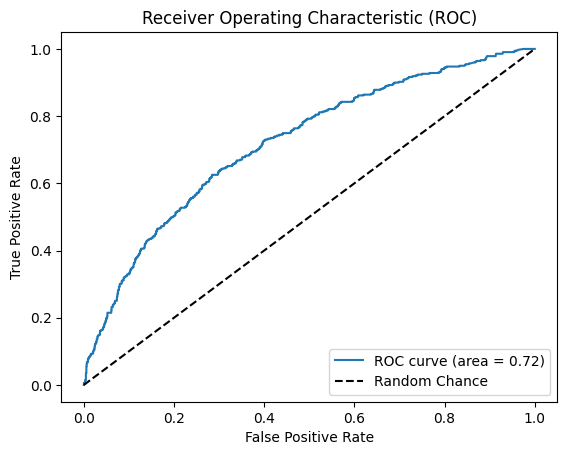

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

model = SVC(probability=True)

model.fit(X_train_selected, y_train)
y_pred_prob = model.predict(X_test_selected)

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_prob)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test_selected, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

selected_features = X.columns[selector.get_support()]
print(coefficients)

Accuracy: 0.8069852941176471
Root Mean Squared Error: 0.4393343895967546
R-squared: 0.8069852941176471
              Feature   Coefficient
0                 loc  1.956016e-03
1                v(g) -8.584856e-03
2               ev(g) -2.625990e-03
3               iv(g)  1.662833e-03
4                   n  2.974675e-03
5                   v -4.743616e-04
6                   l -1.113193e-01
7                   d -2.647043e-03
8                   i  2.231600e-04
9                   b  1.028502e+00
10                  t -3.113764e-07
11             lOCode -2.109290e-03
12          lOComment -9.601017e-04
13            lOBlank  1.059352e-03
14  locCodeAndComment  8.803355e-03
15            uniq_Op  4.424411e-03
16          uniq_Opnd  2.010254e-03
17           total_Op -1.842969e-03
18         total_Opnd -2.233962e-03
19        branchCount  6.657211e-03


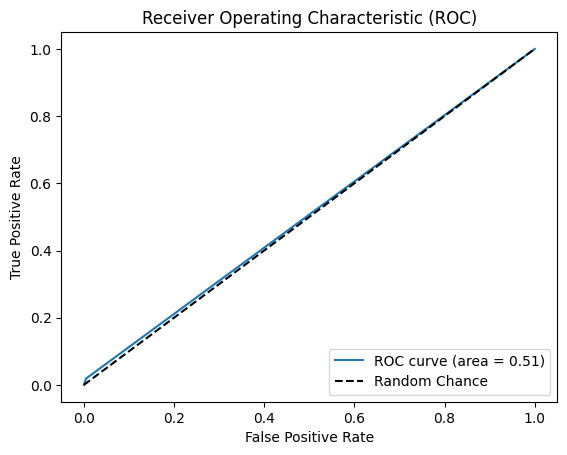

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

model = LogisticRegression()

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
probabilities = model.predict_proba(X_test_selected)[:, 1]
auc = roc_auc_score(y_test, probabilities)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("AUC:", auc)



mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test_selected, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

selected_features = X.columns[selector.get_support()]
print(coefficients)

Accuracy: 0.7996323529411765
Confusion Matrix:
[[1696   61]
 [ 375   44]]
AUC: 0.5325754601777004
Root Mean Squared Error: 0.4393343895967546
R-squared: 0.7996323529411765
              Feature   Coefficient
0                 loc  1.956016e-03
1                v(g) -8.584856e-03
2               ev(g) -2.625990e-03
3               iv(g)  1.662833e-03
4                   n  2.974675e-03
5                   v -4.743616e-04
6                   l -1.113193e-01
7                   d -2.647043e-03
8                   i  2.231600e-04
9                   b  1.028502e+00
10                  t -3.113764e-07
11             lOCode -2.109290e-03
12          lOComment -9.601017e-04
13            lOBlank  1.059352e-03
14  locCodeAndComment  8.803355e-03
15            uniq_Op  4.424411e-03
16          uniq_Opnd  2.010254e-03
17           total_Op -1.842969e-03
18         total_Opnd -2.233962e-03
19        branchCount  6.657211e-03


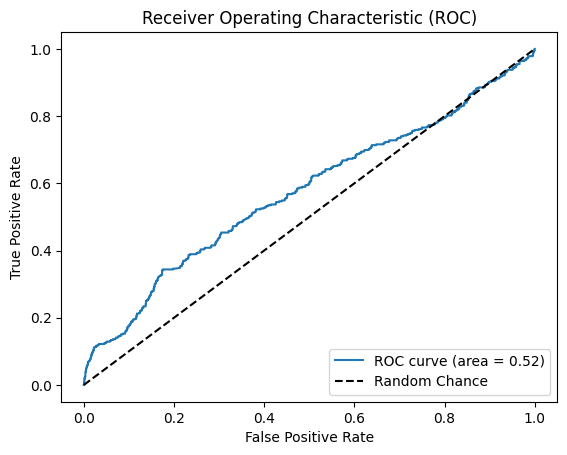

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()